<a href="https://colab.research.google.com/github/arslanworkspace/CodeAlpha_DataScience_Tasks/blob/main/M_Arslan_DataScience_Internship_Task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unemployment Analysis with Python

### Download Dataset

In [30]:
!gdown '1-EWFnJfUO7zIrzd7qQQfM4_bkgVoXv6O'

Downloading...
From: https://drive.google.com/uc?id=1-EWFnJfUO7zIrzd7qQQfM4_bkgVoXv6O
To: /content/Unemployment in India.csv
100% 47.0k/47.0k [00:00<00:00, 77.2MB/s]


In [31]:
!gdown '128eqR5ynzRb1NGI2hv8-N491HAdmIG8f'

Downloading...
From: https://drive.google.com/uc?id=128eqR5ynzRb1NGI2hv8-N491HAdmIG8f
To: /content/Unemployment_Rate_upto_11_2020.csv
100% 18.3k/18.3k [00:00<00:00, 46.4MB/s]


### 1- Import Required Libraries

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### 2- Load the Dataset

In [33]:
# Load the dataset
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

# Display the first few rows
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


### 3- Rename Columns for Better Understanding

In [34]:
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
              'Estimated Employed', 'Estimated Labour Participation Rate (%)',
              'Region', 'Longitude', 'Latitude']

### 4- Convert Date Column to DateTime Format

In [35]:
df['Date'] = pd.to_datetime(df['Date'])

### 5- Check for Missing Values

In [36]:
df.isnull().sum()

,0
States,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region,0
Longitude,0
Latitude,0


### 6- Display Dataset Info and Summary Statistics

In [37]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   States                                   267 non-null    object        
 1   Date                                     267 non-null    datetime64[ns]
 2   Frequency                                267 non-null    object        
 3   Estimated Unemployment Rate (%)          267 non-null    float64       
 4   Estimated Employed                       267 non-null    int64         
 5   Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   Region                                   267 non-null    object        
 7   Longitude                                267 non-null    float64       
 8   Latitude                                 267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), 

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Longitude,Latitude
count,267,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,2020-06-16 09:15:30.337078528,12.236929,1.396211e+07,41.681573,22.826048,80.532425
min,2020-01-31 00:00:00,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,2020-03-31 00:00:00,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,2020-06-30 00:00:00,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,2020-08-31 00:00:00,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,2020-10-31 00:00:00,75.850000,5.943376e+07,69.690000,33.778200,92.937600
std,NaN,10.803283,1.336632e+07,7.845419,6.270731,5.831738


### 7- Unemployment Rate Over Time (Line Plot)

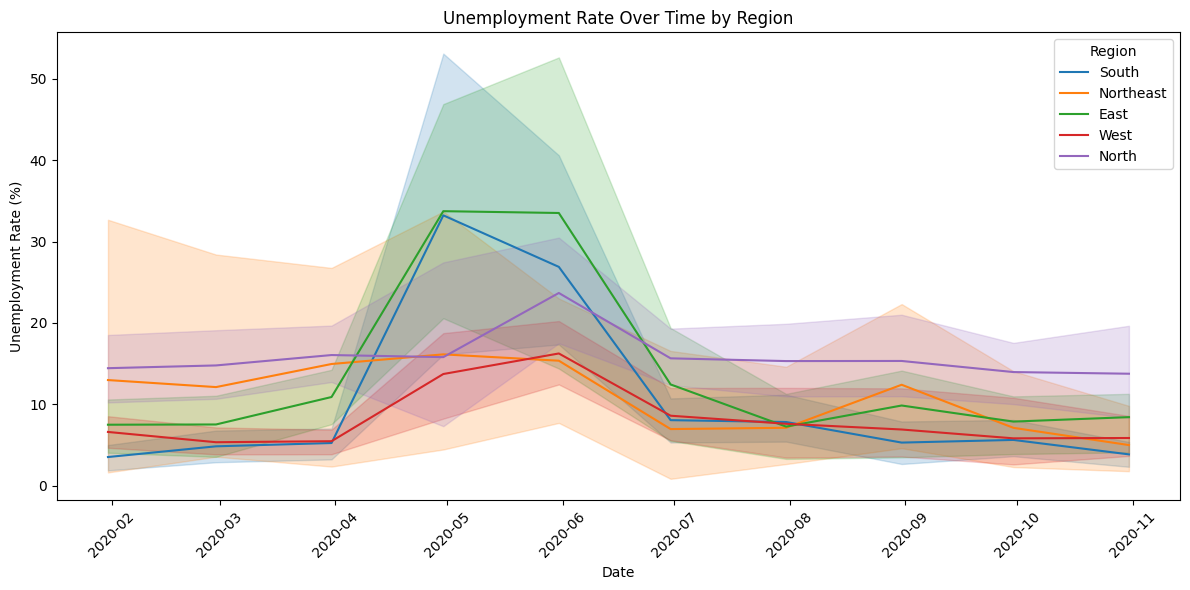

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title('Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 8- Average Unemployment Rate by State (Bar Plot)

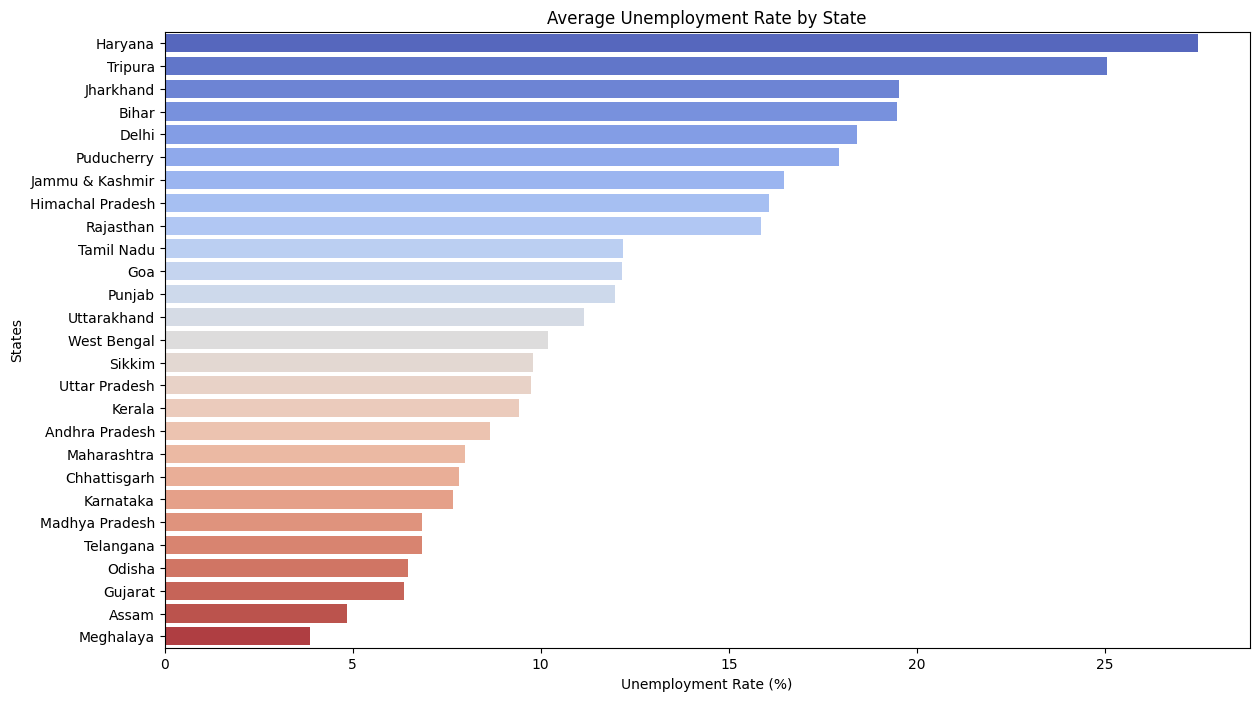

In [39]:
plt.figure(figsize=(14, 8))
state_avg = df.groupby('States')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
sns.barplot(x=state_avg.values, y=state_avg.index, palette='coolwarm')
plt.title('Average Unemployment Rate by State')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('States')
plt.show()

### 9- Unemployment Rate by Region (Bar Plot)

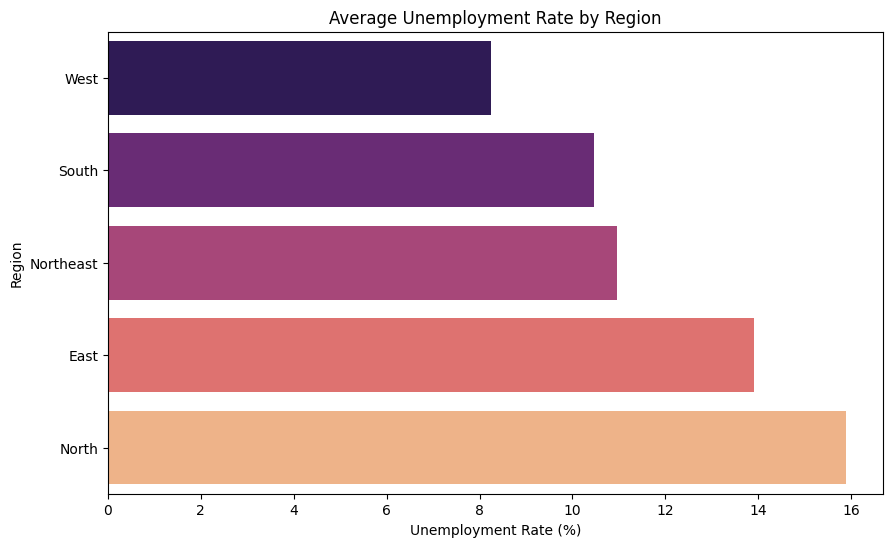

In [40]:
region_avg = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=region_avg.values, y=region_avg.index, palette='magma')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Region')
plt.show()

### 10- Heatmap of Unemployment Rate

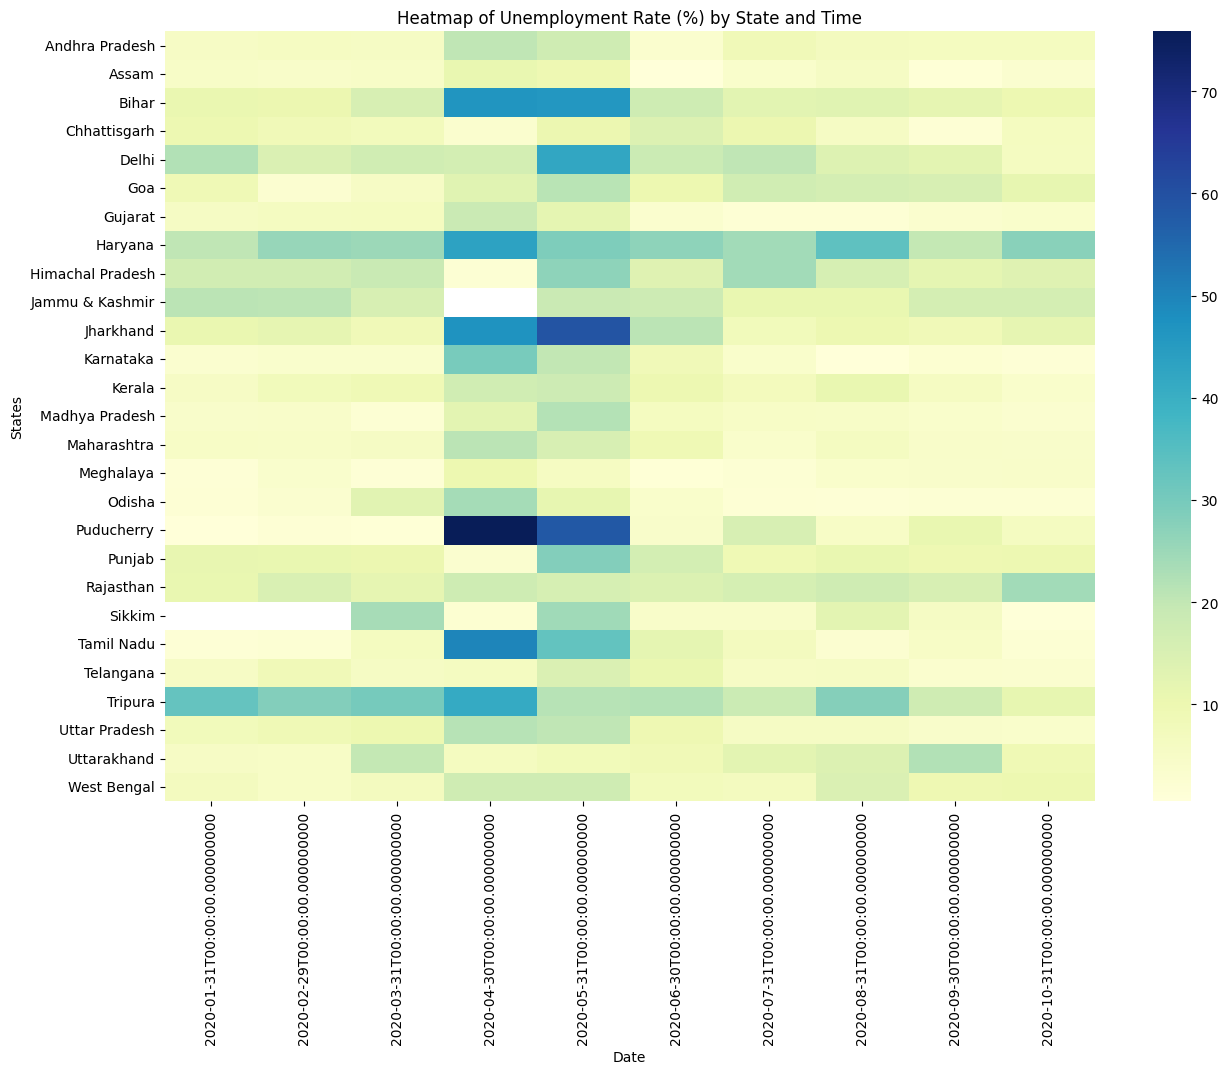

In [41]:
pivot_df = df.pivot_table(values='Estimated Unemployment Rate (%)',
                          index='States', columns='Date')
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_df, cmap="YlGnBu")
plt.title('Heatmap of Unemployment Rate (%) by State and Time')
plt.show()

### 11- Final Insights and Conclusion

In [42]:
print("Key Insights:")
print("1. Unemployment peaked in April-May 2020 due to COVID-19 lockdown.")
print("2. Northern and Central regions experienced higher unemployment rates.")
print("3. States like Haryana, Rajasthan, Jharkhand showed significant spikes.")
print("4. Southern states had relatively stable employment.")

Key Insights:
1. Unemployment peaked in April-May 2020 due to COVID-19 lockdown.
2. Northern and Central regions experienced higher unemployment rates.
3. States like Haryana, Rajasthan, Jharkhand showed significant spikes.
4. Southern states had relatively stable employment.
